In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/home/mahaputra971/pt_skp/data_tripadvisor.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               150 non-null    object
 1   trip               150 non-null    object
 2   title              150 non-null    object
 3   images             150 non-null    object
 4   rating             150 non-null    int64 
 5   language           150 non-null    object
 6   reviewer           150 non-null    object
 7   review_id          150 non-null    int64 
 8   like_count         150 non-null    int64 
 9   review_tip         33 non-null     object
 10  subratings         150 non-null    object
 11  review_link        150 non-null    object
 12  is_translated      150 non-null    bool  
 13  owner_response     138 non-null    object
 14  created_at_date    150 non-null    object
 15  original_language  150 non-null    object
 16  published_at_date  150 non-null    object
dt

In [4]:
print(df)

                                                  text  \
0    Beautiful property with lovely staff. The gard...   
1    The hotel location is great- right in front of...   
2    We were a group of 14 staying locally and came...   
3    Quiet retreat next to the beach. Absolutely lo...   
4    We didn't stay at the hotel but had a day trip...   
..                                                 ...   
145  We stayed for four nights at Pondok Pitaya rec...   
146  We stayed at the Pondok Pitaya for four nights...   
147  We had booked to stay here 2 nights to go surf...   
148  I spend one night and it was hard to sleep bec...   
149  This is just a review of the restaurant at Pon...   

                                                  trip  \
0    {"stay_date": "2025-10-31", "trip_type": "coup...   
1    {"stay_date": "2025-08-31", "trip_type": "fami...   
2    {"stay_date": "2024-01-31", "trip_type": "fami...   
3    {"stay_date": "2022-07-31", "trip_type": "frie...   
4    {"stay_d

In [5]:
import pandas as pd
import re

# --- FUNGSI EKSTRAKSI YANG LEBIH KUAT (ROBUST) ---
def extract_trip_robust(text):
    if not isinstance(text, str):
        return pd.Series([None, None])
    
    # Regex ini menangkap:
    # 1. stay_date (dengan atau tanpa kutip), pemisah titik dua, lalu ambil tanggal
    # Pola: cari 'stay_date', abaikan tanda baca sekitarnya, ambil angka-strip
    date_match = re.search(r"['\"]?stay_date['\"]?\s*:\s*['\"]?([\d-]+)['\"]?", text)
    
    # 2. trip_type (dengan atau tanpa kutip)
    # Pola: cari 'trip_type', abaikan tanda baca, ambil huruf
    type_match = re.search(r"['\"]?trip_type['\"]?\s*:\s*['\"]?([a-zA-Z\s]+)['\"]?", text)
    
    stay_date = date_match.group(1) if date_match else None
    
    # Bersihkan trip_type dari sisa quote atau spasi jika ada
    trip_type = type_match.group(1).strip() if type_match else None
    if trip_type and trip_type.lower() == 'none': trip_type = None # Handle string 'None'

    return pd.Series([stay_date, trip_type])

def extract_reviewer_robust(text):
    if not isinstance(text, str):
        return pd.Series([None, None])
    
    # Regex untuk Name: Ambil teks setelah 'name': sampai ketemu koma atau akhir dictionary
    # Pola: 'name' : 'ISI_NAMA' (berhenti sebelum koma atau quote penutup)
    name_match = re.search(r"['\"]?name['\"]?\s*:\s*['\"]?([^',}]+)['\"]?", text)
    
    # Regex untuk Avatar: Ambil link http/https
    avatar_match = re.search(r"(https?://[^\s',}]+)", text)
    
    name = name_match.group(1).strip() if name_match else None
    avatar = avatar_match.group(1).strip() if avatar_match else None
    
    return pd.Series([name, avatar])

# --- EKSEKUSI ---
# 1. Load Data
file_path = '/home/mahaputra971/pt_skp/data_tripadvisor.xlsx' 
try:
    df = pd.read_csv(file_path)
except:
    df = pd.read_excel(file_path)

print("Data dimuat. Memproses...")

# 2. Terapkan Ekstraksi
df[['stay_date', 'trip_type']] = df['trip'].apply(extract_trip_robust)
df[['reviewer_name', 'reviewer_avatar']] = df['reviewer'].apply(extract_reviewer_robust)

# 3. DEBUG: Cek apakah masih kosong?
print("\n--- Pengecekan Hasil (5 Baris Pertama) ---")
# Kita print kolom aslinya sedikit dan kolom barunya untuk membandingkan
print(df[['trip', 'stay_date', 'trip_type']].head(5))

# 4. Simpan
df.to_csv('data_tripadvisor_fixed_v2.csv', index=False)
print("\nDisimpan ke 'data_tripadvisor_fixed_v2.csv'")

Data dimuat. Memproses...

--- Pengecekan Hasil (5 Baris Pertama) ---
                                                trip   stay_date trip_type
0  {"stay_date": "2025-10-31", "trip_type": "coup...  2025-10-31   couples
1  {"stay_date": "2025-08-31", "trip_type": "fami...  2025-08-31    family
2  {"stay_date": "2024-01-31", "trip_type": "fami...  2024-01-31    family
3  {"stay_date": "2022-07-31", "trip_type": "frie...  2022-07-31   friends
4  {"stay_date": "2022-06-30", "trip_type": "coup...  2022-06-30   couples

Disimpan ke 'data_tripadvisor_fixed_v2.csv'


In [6]:
df_fixed = pd.read_csv('data_tripadvisor_fixed_v2.csv')

In [7]:
df_fixed.head()

,text,trip,title,images,rating,language,reviewer,review_id,like_count,review_tip,...,review_link,is_translated,owner_response,created_at_date,original_language,published_at_date,stay_date,trip_type,reviewer_name,reviewer_avatar
0,Beautiful property with lovely staff. The gard...,"{""stay_date"": ""2025-10-31"", ""trip_type"": ""coup...",8 night stay,"[""https://dynamic-media-cdn.tripadvisor.com/me...",5,en,"{""name"": ""Katrina B"", ""avatar"": ""https://dynam...",1035629478,0,NaN,...,https://www.tripadvisor.com/ShowUserReviews-g6...,False,NaN,2025-10-20,en,2025-10-20,2025-10-31,couples,"Katrina B""",https://dynamic-media-cdn.tripadvisor.com/medi...
1,The hotel location is great- right in front of...,"{""stay_date"": ""2025-08-31"", ""trip_type"": ""fami...",Nice beachfront stay.,[],5,en,"{""name"": ""Amber H"", ""avatar"": ""https://dynamic...",1027812713,0,NaN,...,https://www.tripadvisor.com/ShowUserReviews-g6...,False,NaN,2025-08-31,en,2025-08-31,2025-08-31,family,"Amber H""",https://dynamic-media-cdn.tripadvisor.com/medi...
2,We were a group of 14 staying locally and came...,"{""stay_date"": ""2024-01-31"", ""trip_type"": ""fami...",Beautiful place overlooking the beach,[],5,en,"{""name"": ""Simon G"", ""avatar"": ""https://dynamic...",932003690,0,NaN,...,https://www.tripadvisor.com/ShowUserReviews-g6...,False,NaN,2024-01-02,en,2024-01-02,2024-01-31,family,"Simon G""",https://dynamic-media-cdn.tripadvisor.com/medi...
3,Quiet retreat next to the beach. Absolutely lo...,"{""stay_date"": ""2022-07-31"", ""trip_type"": ""frie...",Rustic and peaceful,"[""https://dynamic-media-cdn.tripadvisor.com/me...",5,en,"{""name"": ""AlanNeedsMoreTravel"", ""avatar"": ""htt...",855200936,0,NaN,...,https://www.tripadvisor.com/ShowUserReviews-g6...,False,NaN,2022-08-20,en,2022-08-20,2022-07-31,friends,"AlanNeedsMoreTravel""",https://dynamic-media-cdn.tripadvisor.com/medi...
4,We didn't stay at the hotel but had a day trip...,"{""stay_date"": ""2022-06-30"", ""trip_type"": ""coup...",Visited for lunch- wonderful pool area!,[],5,en,"{""name"": ""Francesca S"", ""avatar"": ""https://dyn...",842948127,0,Enjoy the pool area! It was so relaxing we eve...,...,https://www.tripadvisor.com/ShowUserReviews-g6...,False,NaN,2022-06-15,en,2022-06-15,2022-06-30,couples,"Francesca S""",https://dynamic-media-cdn.tripadvisor.com/medi...


--- Total Data Per Bulan (Akumulasi Semua Tahun) ---
published_at_date
July         21
August       19
October      16
February     14
September    14
March        12
June         12
April        11
May          11
November      9
January       6
December      5
Name: count, dtype: int64


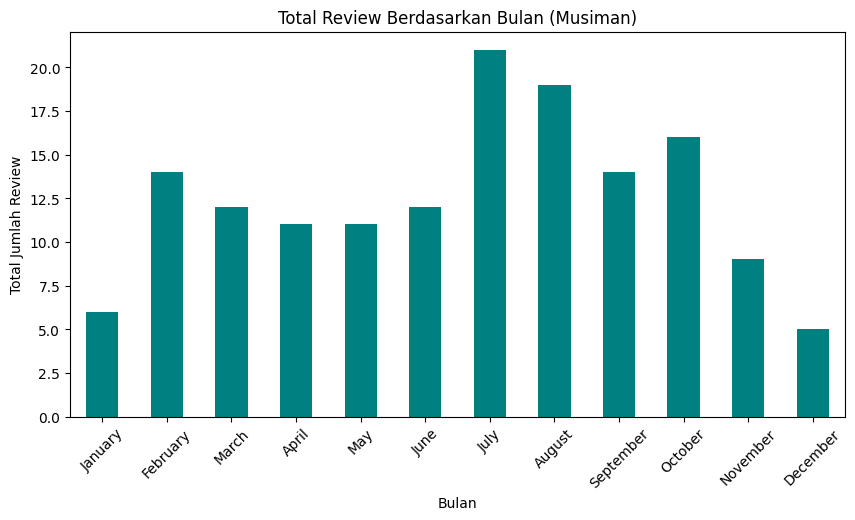

In [8]:
import pandas as pd

# 1. Pastikan kolom target sudah format datetime
col_name = 'published_at_date'  # Sesuaikan nama kolom tanggal Anda
df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

# 2. Urutan bulan yang benar (agar tidak terurut abjad April duluan)
bulan_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# 3. Ambil nama bulan dan hitung
# dt.month_name() mengambil nama bulan (Jan, Feb, dst) mengabaikan tahun
monthly_counts = df[col_name].dt.month_name().value_counts()

# 4. Urutkan hasil sesuai kalender (bukan jumlah terbanyak)
monthly_counts = monthly_counts.reindex(bulan_order, fill_value=0)

# 5. Tampilkan Hasil
print("--- Total Data Per Bulan (Akumulasi Semua Tahun) ---")
print(monthly_counts.sort_values(ascending=False))

# --- Opsional: Tampilkan dalam Grafik Batang ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='teal')
plt.title('Total Review Berdasarkan Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Review')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_16231/2319878804.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index(date_col).resample('M').size()


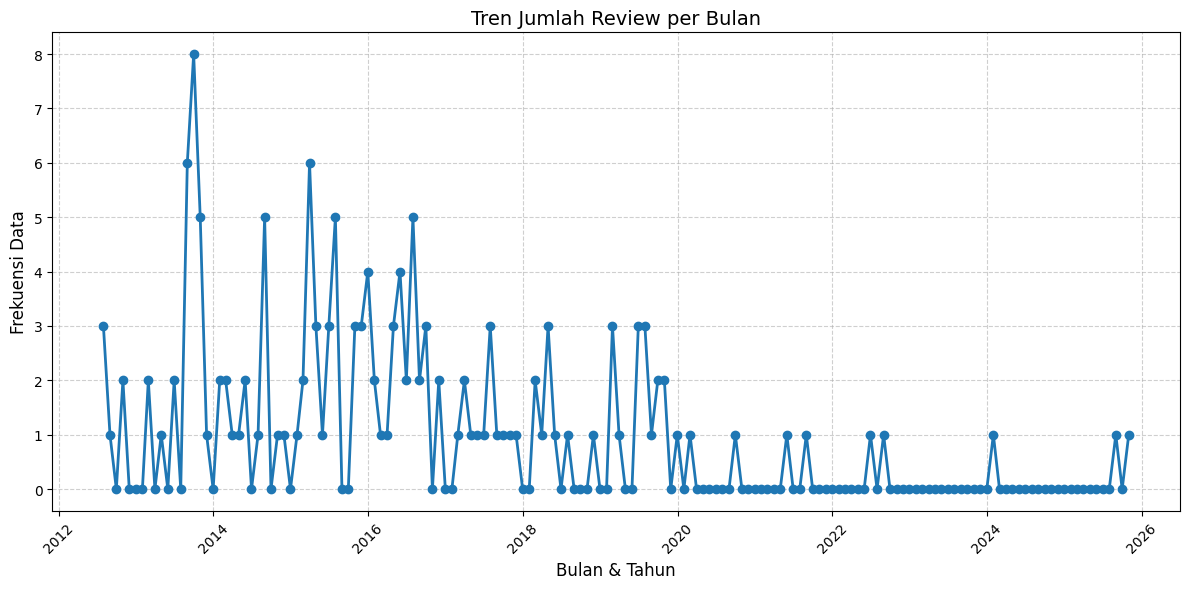

created_at_date
2013-09-30    8
2013-08-31    6
2015-03-31    6
2013-10-31    5
2014-08-31    5
             ..
2020-10-31    0
2013-05-31    0
2020-08-31    0
2020-07-31    0
2013-03-31    0
Length: 160, dtype: int64

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pastikan kolom tanggal dikenali sebagai datetime
# Ganti 'published_at_date' dengan 'review_post_date' jika Anda sudah merename kolomnya
date_col = 'created_at_date' 
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 2. Resample data per Bulan (M) dan hitung jumlahnya (.size())
# Kita set tanggal sebagai index dulu agar bisa di-resample
monthly_counts = df.set_index(date_col).resample('M').size()

# 3. Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='#1f77b4', linewidth=2)

# Mempercantik tampilan
plt.title(f'Tren Jumlah Review per Bulan', fontsize=14)
plt.xlabel('Bulan & Tahun', fontsize=12)
plt.ylabel('Frekuensi Data', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan
plt.show()
monthly_counts.sort_values(ascending=False)